# pya - Python Audio Coding Package Examples
## Amfcc - Mel-frequency cepstral coefficients class
(c) 2019 by Thomas Hermann, Jiajun Yang and Alexander Neumann, Bielefeld University, Bielefeld, Germany

In [1]:
# This part only makes sure that the repository version of pya is used for this notebook ...
import os, sys, inspect, io

cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

# ... the part relevant for pya usage starts here
from pya import Asig, Amfcc

Asig('word'): 1 x 87040 @ 44100Hz = 1.974s cn=['0']

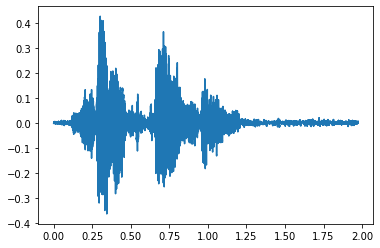

In [2]:
# Load a sample audio
aword = Asig("samples/sonification.wav", label='word')
aword.plot()

[[ -9.17548107 -15.13285146   5.73257773 ...  -3.2166908  -10.76164443
    1.32956441]
 [ -9.14692637 -16.17379626   5.54862945 ...  -7.32108897 -11.65220551
   -0.88169502]
 [ -9.18433397 -13.87876107   6.81787026 ...   2.94985548 -14.60185015
   -4.87923131]
 ...
 [ -9.07456594 -15.13518397  11.04234605 ...  -1.4942507   -5.81623361
   -1.79442066]
 [ -9.03225387 -13.53938344  11.99418285 ...   4.10384531   1.00526457
    1.34213652]
 [ -9.28960578 -14.93989893   8.99820526 ...  -1.09119139 -10.48636787
    3.15961457]]


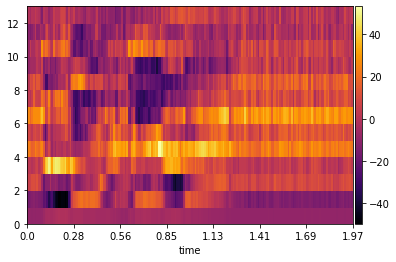

In [3]:
amfcc = aword.to_mfcc()
amfcc.plot()
print(amfcc.features)  # or amfcc.cepstra, same thing

## Here is what it does under the hood, and the parameters you can set 
    * Frame the signal into short frames.
    * For each frame calculate the periodogram estimate of the power spectrum.
    * Apply the mel filterbank to the power spectra, sum the energy in each filter.
    * Take the DCT of the log filterbank energies.
    * Keep DCT coefficients 2-13, discard the rest.
    * Take the logarithm of all filterbank energies.

In [ ]:
"""
Attributes
    ----------
    x : Asig or numpy.ndarray
        x can be two forms, the most commonly used is an Asig object. 
        Such as directly acquired from an Asig object via Asig.to_stft().
    sr : int
        sampling rate, this is only necessary if x is not Asig.
    duration : float
        Duration of the signal in second,
    label : str
        A string label as an identifier.
    n_per_frame : int
        Number of samples per frame
    hopsize : int
        Number of samples of each successive frame.
    nfft : int
        FFT size, default to be next power of 2 integer of n_per_frame
    window : str
        Type of the window function (Default value='hann'), 
        use scipy.signal.get_window to return a numpy array. 
        If None, no windowing will be applied.
    nfilters : int
        The number of mel filters. Default is 26
    ncep : int
        Number of cepstrum. Default is 13
    cepliter : int
        Lifter's cepstral coefficient. Default is 22
    frames : numpy.ndarray
        The original signal being reshape into frame based on 
        n_per_frame and hopsize.
    frame_energy : numpy.ndarray
        Total power spectrum energy of each frame.
    filter_banks : numpy.ndarray
        An array of mel filters
    cepstra : numpy.ndarray
        An array of the MFCC coeffcient, size: nframes x ncep
"""
